In [715]:
import numpy as np
from numpy import*
import matplotlib.pyplot as plt  
from scipy.optimize import minimize
import time
import os

In [716]:
np.random.seed(1000)
if not os.path.isdir('./figure/LinearClassificationExample_Tanh/'):
    os.makedirs('./figure/LinearClassificationExample_Tanh/')
figure_dir = './figure/LinearClassificationExample_Tanh/'

## Data

$f(x,y)=-0.6\sin(\frac{\pi}2+3x)-0.20$

$f(x,y)=-0.6\sin(\frac{\pi}2+3x)+0.20$

These are the equations of the curves with which we would like to find the optimal parameter set. 

In [717]:
X,Y = np.meshgrid(np.arange(-1,1,0.05),np.arange(-1,2,0.05));
n1 = X.shape[0]
n2 = X.shape[1]
x = np.arange(-1,1,0.05)
y1 = -0.6*np.sin(3*x+np.pi/2)-0.20
y2 = -0.6*np.sin(3*x+np.pi/2)+0.20
dummy=time.time()

Text(0.5,1,'The Original Curves')

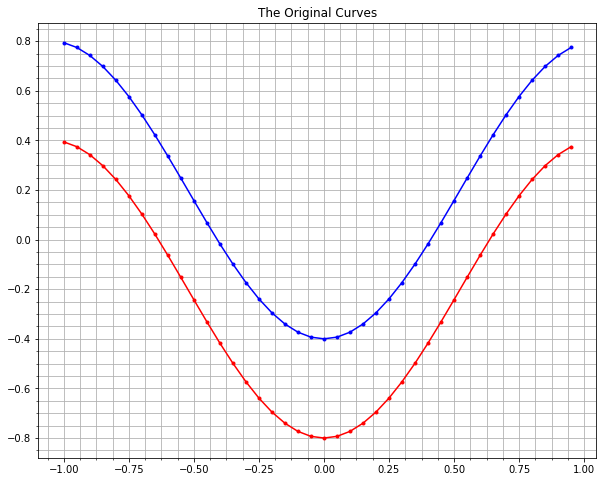

In [718]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
plt.grid(which='both')
plt.plot(x, y1, 'r.-')
plt.plot(x, y2, 'b.-')
plt.title('The Original Curves')

In [719]:
# starting point 1
tol=1e-10
a  = -0.8
b = 1
c = -0.5
w11 = 2
w12 = 1
w21 = 2
w22 = 1
b1  = 0.0
params1 =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])

In [720]:
# starting point 2
tol=1e-10
a = -20
b = 5
c = -6
w11 = 1
w12 = 0
w21 = 66
w22 = 2
b1 = 0.0
b2 = 0.0
params2 =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])

In [721]:
# starting point 3
tol=1e-10
a = 3
b = 0.4
c = -2
w11 = 19
w12 = 2
w21 = 6
w22 = -2
b1 = 0.0
b2 = 0.0
params3 =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])

These are the 3 different starting points we will use.

## Optimization (Simplex)

The first thing we will do in this section is to transform the original curves using tanh. Then we will use various objective functions (3 in total, including the one provided) to find optimal parameter sets, and we will graph the lines generated using these optimal sets. None of the objective functions in this section will use gradient descent.

In [722]:
a, b, c, w11, w12, w21, w22, b1, b2 = params1
xHat = np.tanh(w11*X + w21*Y + b1)
yHat = np.tanh(w12*X + w22*Y + b2)
xHat1 = np.tanh(w11*x + w21*y1 + b1)
yHat1 = np.tanh(w12*x + w22*y1 + b2)
xHat2 = np.tanh(w11*x + w21*y2 + b1)
yHat2 = np.tanh(w12*x + w22*y2 + b2)

Text(0.5,1,'Transformed x and y using tanh hidden layer')

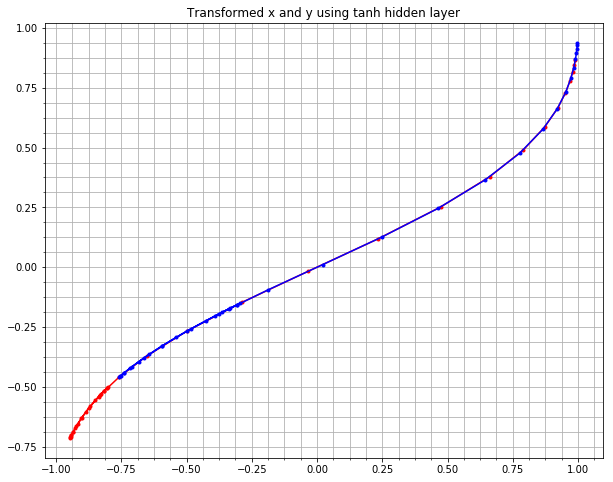

In [723]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
plt.grid(which='both')
plt.plot(xHat1, yHat1, 'r.-')
plt.plot(xHat2, yHat2, 'b.-')
plt.title('Transformed x and y using tanh hidden layer')

Now that the original curves are transformed, we are now able to find a line such that it will not intersect with either of the curves.

In [679]:
# Objective Function
def objFunc0(params, X, Y, x, y1, y2, dummy):
    a, b, c, w11, w12, w21, w22, b1, b2 = params

    mae = 0
    
    xHat = np.tanh(w11*X + w21*Y + b1)
    yHat = np.tanh(w12*X + w22*Y + b2)
    
    xHat1 = np.tanh(w11*x + w21*y1 + b1)
    yHat1 = np.tanh(w12*x + w22*y1 + b2)
    
    xHat2 = np.tanh(w11*x + w21*y2 + b1)
    yHat2 = np.tanh(w12*x + w22*y2 + b2)
    
    # for y2 t = 1
    e = +1*(a*xHat2 + b*yHat2 + c)/np.sqrt(a**2+b**2)
    mae = mae - np.sum(e[e<0])
    
    # for y1 t = -1
    e = -1*(a*xHat1 + b*yHat1 + c)/np.sqrt(a**2+b**2)
    mae = mae - np.sum(e[e<0])
    hm = int(time.time()-dummy)
    if hm < 101:
        if hm>0:
            plt.savefig(figure_dir + 'linearClassificationTanhHiddenLayer-'+ str(hm-1)+'.png')
        else:
            plt.savefig(figure_dir + 'linearClassificationTanhHiddenLayer-'+str(hm)+'.png')
    return mae

In [691]:
res0_1 = minimize(objFunc0, params1, args=(X, Y, x,y1,y2,dummy), tol=tol, options={'disp': True,'maxiter':500})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 165
         Gradient evaluations: 15


Text(0.5,1,'Optimization #1 using Objective Function 0 (Given)')

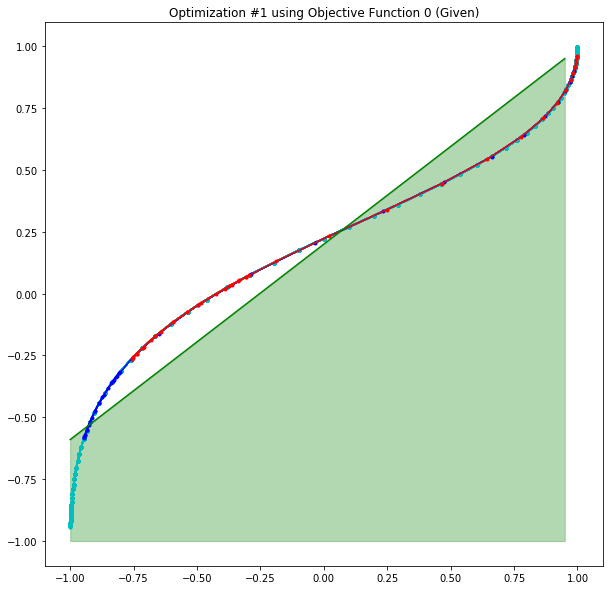

In [692]:
plt.figure(figsize=(10, 10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-res0_1.x[2]-res0_1.x[0]*x)/res0_1.x[1], 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-res0_1.x[2]-res0_1.x[0]*x)/res0_1.x[1])]),(-res0_1.x[2]-res0_1.x[0]*x)/res0_1.x[1],color='g',alpha=0.3)
plt.title('Optimization #1 using Objective Function 0 (Given)')

As we can see from the above graph, the optimal line fits nicely between the two curves, and does not intersect. Thus, objective function 0 was able to successfully generate the optimal parameter set. Next, we will perform this optimization using the two different starting points.

In [693]:
#Hinge-Loss Objective Function
def objFunc1(params, X, Y, x, y1, y2, dummy):
    a, b, c, w11, w12, w21, w22, b1, b2 = params

    mae = 0
    
    xHat = np.tanh(w11*X + w21*Y + b1)
    yHat = np.tanh(w12*X + w22*Y + b2)
    
    xHat1 = np.tanh(w11*x + w21*y1 + b1)
    yHat1 = np.tanh(w12*x + w22*y1 + b2)
    
    xHat2 = np.tanh(w11*x + w21*y2 + b1)
    yHat2 = np.tanh(w12*x + w22*y2 + b2)
    
    # for y2 t = 1
    e = +1*(a*xHat2 + b*yHat2 + c) #deleted the bottom because dividing by the magnitude shoudn't matter too much! @vivian check this
    mae = mae + np.sum(np.maximum(1-e,np.zeros(len(e))))
    
    # for y1 t = -1
    e = -1*(a*xHat1 + b*yHat1 + c)
    mae = mae + np.sum(np.maximum(1-e,np.zeros(len(e))))
    
    return mae

In [653]:
res1 = minimize(objFunc1, params, args=(X, Y, x,y1,y2,dummy), tol=tol, options={'disp': True,'maxiter':500})
print(res1.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 297
         Gradient evaluations: 27
[-6.25929973  8.04658067 -3.15070192  7.07575647  9.17386197 -4.73462307
  6.95564136 -2.33531296  3.7792592 ]


Text(0.5,1,'Optimization using Objective Function 1 (Hinge Loss)')

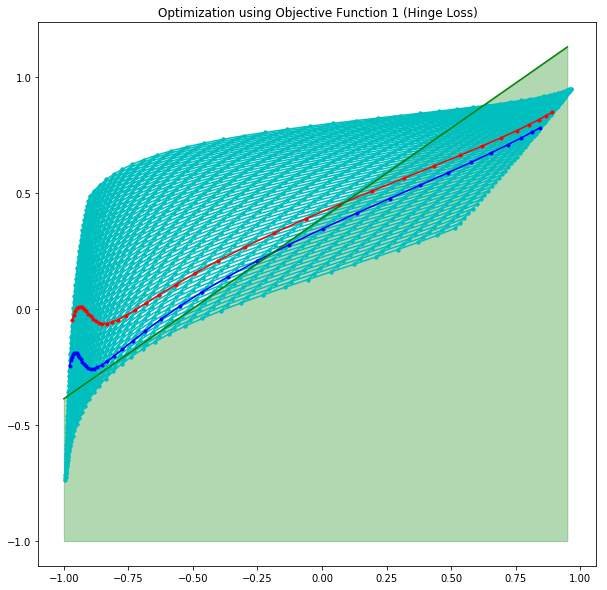

In [654]:
plt.figure(figsize=(10, 10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-res1.x[2]-res1.x[0]*x)/res1.x[1], 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-res1.x[2]-res1.x[0]*x)/res1.x[1])]),(-res1.x[2]-res1.x[0]*x)/res1.x[1],color='g',alpha=0.3)
plt.title('Optimization using Objective Function 1 (Hinge Loss)')

In the second objective function, it was not quite able to come to a line that fit in between the curves. However, it came pretty close. This indicates that perhaps the objective function may not have worked perfectly as intended, even though we spent a long time trying to make it fit.

In [655]:
#Logistic Objective Function
def objFunc2(params, X, Y, x, y1, y2, dummy):
    a, b, c, w11, w12, w21, w22, b1, b2 = params

    mae = 0
    
    xHat = np.tanh(w11*X + w21*Y + b1)
    yHat = np.tanh(w12*X + w22*Y + b2)
    
    xHat1 = np.tanh(w11*x + w21*y1 + b1)
    yHat1 = np.tanh(w12*x + w22*y1 + b2)
    
    xHat2 = np.tanh(w11*x + w21*y2 + b1)
    yHat2 = np.tanh(w12*x + w22*y2 + b2)
    
    # for y2 t = 1
    e = +1*1/(1+np.exp(-a*xHat1))
    mae = mae - np.sum(e[e<0])
    
    # for y1 t = -1
    e = -1*1/(1+np.exp(-a*xHat1))
    mae = mae - np.sum(e[e<0])
    
    return mae

In [656]:
res2 = minimize(objFunc2, params, args=(X, Y, x,y1,y2,dummy), tol=tol, options={'disp': True,'maxiter':500})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 231
         Gradient evaluations: 21


Text(0.5,1,'Optimization using Objective Function 2 (Logistic)')

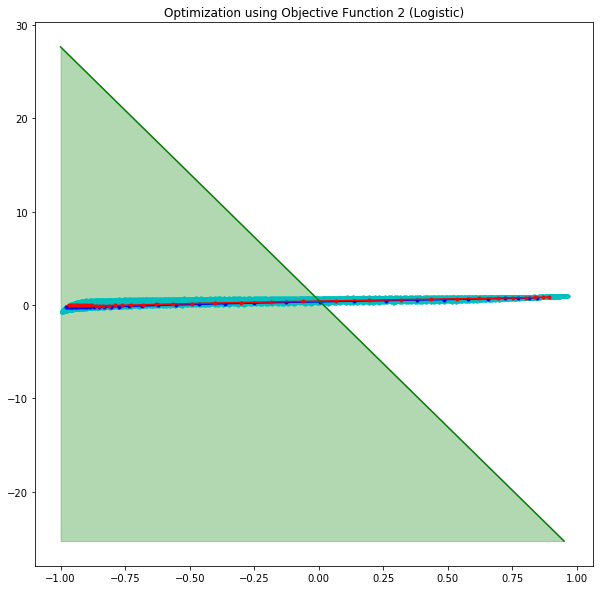

In [658]:
plt.figure(figsize=(10, 10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-res2.x[2]-res2.x[0]*x)/res2.x[1], 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-res2.x[2]-res2.x[0]*x)/res2.x[1])]),(-res2.x[2]-res2.x[0]*x)/res2.x[1],color='g',alpha=0.3)
plt.title('Optimization using Objective Function 2 (Logistic)')

In the third objective function, it seems as though the scale, in addition to the slope of the line is incorrect. We are not sure as to what caused this.

# Optimization (Gradient Descent)

This section focuses on optimization using gradient descent. We will use two different functions to arrive at an optimal parameter set.

In [784]:
def logisticGradientDescent (params, X,Y,x,y1,y2, dummy):
    rate = 0.25
    precision = 0.0001
    previous_step_size = 1
    max_iters = 100000
    iterator = 0 #iteration counter
    
#in our logistic function, a is really the only one of the parameters
#thus, the other partial derviatives are 0 and are not included in our calculation
#this simplifies this gradient function greatly
    xHat = np.tanh(w11*X + w21*Y + b1)
    yHat = np.tanh(w12*X + w22*Y + b2)
    
    xHat1 = np.tanh(w11*x + w21*y1 + b1)
    yHat1 = np.tanh(w12*x + w22*y1 + b2)
    
    xHat2 = np.tanh(w11*x + w21*y2 + b1)
    print(xHat2)
    yHat2 = np.tanh(w12*x + w22*y2 + b2)
    
    cur_a = a
    cur_w11 = w11
    dA = xHat2*np.exp(-a*xHat2)*1/(1+np.exp(-a*xHat2))
    dw11 = a*1/(1+np.exp(-a*x)*x*(1/(np.cos((w11*x + w21*y1 + b1)))))
    
    while iterator < max_iters:         
        iterator = iterator + 1
        dA = xHat2*np.exp(-cur_a*xHat2)*1/(1+np.exp(-cur_a*xHat2))
        dw11 = cur_a*1/(1+np.exp(-cur_a*x)*x*(1/(np.cos((cur_w11*x + w21*y1 + b1)))))
        cur_w11 = cur_w11+rate*dw11
        cur_a = cur_a+rate*dA
    
    print (cur_a)
    print(cur_w11)
    parameters = cur_a,b,c,cur_w11,w12,w21,w22, 0 , 0
    return parameters



In [795]:
# starting point 3
tol=1e-10
a = 3
b = 0.4
c = -2
w11 = 19
w12 = 2
w21 = 6
w22 = -2
b1 = 0.0
b2 = 0.0
params3 =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])

res3_3 = logisticGradientDescent(params3, X, Y, x, y1, y2, dummy)

[-1.         -1.         -1.         -1.         -1.         -1.         -1.
 -0.99999999 -0.99999999 -0.99999997 -0.99999993 -0.99999983 -0.99999959
 -0.99999897 -0.99999719 -0.9999915  -0.99997103 -0.99988723 -0.99949225
 -0.99733443 -0.98367486 -0.88740404 -0.32677315  0.66870139  0.96600628
  0.997368    0.99982158  0.99998907  0.99999938  0.99999997  1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.        ]
[-10.12615844 -10.12615844 -10.12615844 -10.12615844 -10.12615844
 -10.12615845 -10.12615846 -10.12615849 -10.12615856 -10.12615871
 -10.12615904 -10.12615983 -10.12616174 -10.12616678 -10.12618127
 -10.12622754 -10.12639383 -10.12707485 -10.13028587 -10.14786774
 -10.26073242 -11.14164017 -24.13449487  13.94021684  10.41190669
  10.14862125  10.12863475  10.12727348  10.12718971  10.12718496
  10.12718471  10.1271847   10.1271847   10.1271847   10.1271847
  10.1271847   10.1271847   10.1271847   10.1271847   10.1271847 ]
[ -2.280

In [796]:
# a, b, c, w11, w12, w21, w22, b1, b2 = res2
xHat = np.tanh(res3_3[3]*X + res3_3[5]*Y + res3_3[7])
yHat = np.tanh(res3_3[4]*X + res3_3[6]*Y + res3_3[8])
xHat1 = np.tanh(res3_3[3]*x + res3_3[5]*y1 + res3_3[7])
yHat1 = np.tanh(res3_3[4]*x + res3_3[6]*y1 + res3_3[8])
xHat2 = np.tanh(res3_3[3]*x + res3_3[5]*y2 + res3_3[7])
yHat2 = np.tanh(res3_3[4]*x + res3_3[6]*y2 + res3_3[8])

[68.591726512615182, 0.40000000000000002, 2.0]


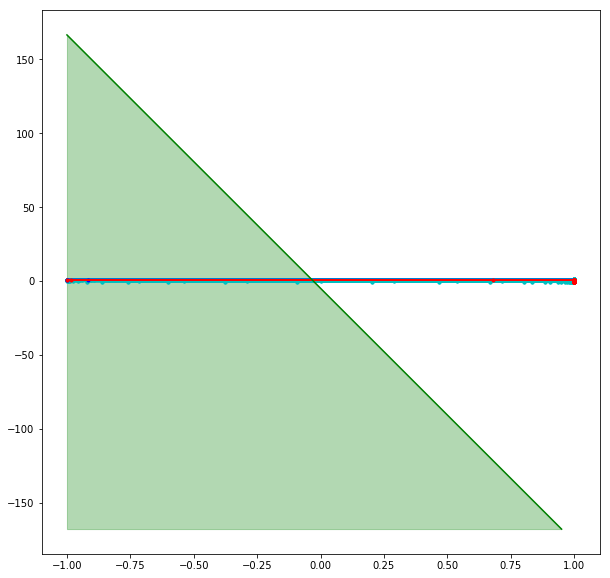

In [797]:
plt.figure(figsize=(10,10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
aPrime = np.linalg.norm(res3_3[0])
bPrime = np.linalg.norm(res3_3[1])
cPrime = np.linalg.norm(res3_3[2])
print([aPrime, bPrime, cPrime])
plt.plot(x, (-cPrime-aPrime*x)/bPrime, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-cPrime-aPrime*x)/bPrime)]),(-cPrime-aPrime*x)/bPrime,color='g',alpha=0.3)
                 
                 

An issue here is that the optimal line is not a line at all; it is a curve. This may be because when we took the partials of the function, the parameters a and w11 became vectors (as indicated when we print out the array of parameters). However, the general direction of the curve seems to be promising.

In [670]:
def hingeLossGradientDescent (params, X,Y,x,y1,y2, dummy):
    rate = 0.25
    precision = 0.0001
    previous_step_size = 1
    max_iters = 100000
    iterator = 0 #iteration counter
#Our hingeloss function has more than just a - we will need to take the 
#partials of a, b, and c.However, we also need to account how the error is used
#because that's a key part of the hinge "loss" function
   
    xHat = np.tanh(w11*X + w21*Y + b1)
    yHat = np.tanh(w12*X + w22*Y + b2)
    
    xHat1 = np.tanh(w11*x + w21*y1 + b1)
    yHat1 = np.tanh(w12*x + w22*y1 + b2)
    
    xHat2 = np.tanh(w11*x + w21*y2 + b1)
    yHat2 = np.tanh(w12*x + w22*y2 + b2)
    
    cur_a = a
    cur_b = b
    cur_c = c
    dA = a*Y #there's no way this can be a constant or else theyd just be changing by constants
    dB = b*y1
    dC =  c*y2
    start = +1*(a*xHat2 + b*yHat2 + c)
    while (iterator<max_iters):
        iterator = iterator + 1
        prev_a = cur_a
        prev_b = cur_b
        prev_c = cur_c
        cur_a = cur_a+rate*dA
        cur_b = cur_b+rate*dB
        cur_c = cur_c +rate*dC
        dA = xHat2 #there's no way this can be a constant or else theyd just be changing by constants
        dB = yHat2
        dC =  1
    start = start + cur_a + cur_b + cur_c
    parameters = np.array([cur_a,cur_b,cur_c,w11,w12,w21,w22, 0 , 0])
    return parameters



In [769]:

res4_1 = np.array(hingeLossGradientDescent(params1, X, Y, x, y1, y2, dummy))

[-21.40079634 -21.4316135  -21.48810254 -21.57751023 -21.71111152
 -21.90494111 -22.17987176 -22.55981896 -23.06642281 -23.70933779
 -24.47458215 -25.3068193   12.09954386  13.02709283  12.33618562
  11.77669088  11.349074    11.0406596   10.835007    10.71781941
  10.67981615  10.71781941  10.835007    11.0406596   11.349074
  11.77669088  12.33618562  13.0269567    6.52134801 -25.31641148
 -24.47458224 -23.70933779 -23.06642281 -22.55981896 -22.17987176
 -21.90494111 -21.71111152 -21.57751023 -21.48810254 -21.4316135 ]


In [770]:
a, b, c, w11, w12, w21, w22, b1, b2 = res3
xHat = np.tanh(res4_1[3]*X + res4_1[5]*Y + res4_1[7])
yHat = np.tanh(res4_1[4]*X + res4_1[6]*Y + b2)
xHat1 = np.tanh(res4_1[3]*x + res4_1[5]*y1 + b1)
yHat1 = np.tanh(res4_1[4]*x + res4_1[6]*y1 + b2)
xHat2 = np.tanh(res4_1[3]*x + res4_1[5]*y2 + b1)
yHat2 = np.tanh(res4_1[4]*x + res4_1[6]*y2 + b2)

[1212808.0158821051, 100104.99673139236, 158072.72447387641]


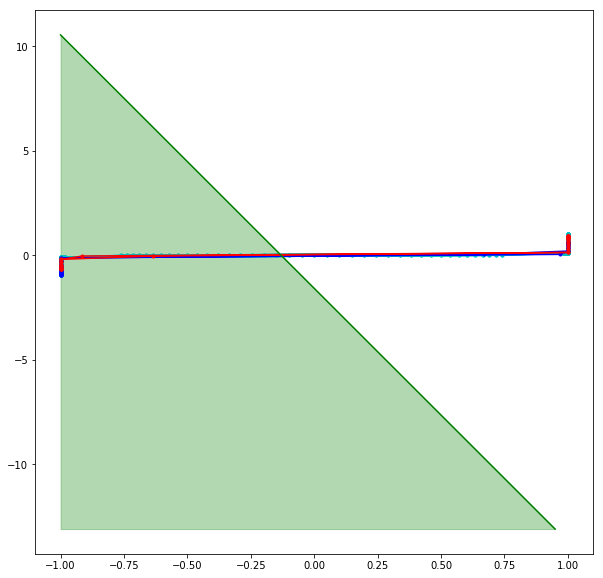

In [771]:
plt.figure(figsize=(10,10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
aPrime = np.linalg.norm(res4_1[0])
bPrime = np.linalg.norm(res4_1[1])
cPrime = np.linalg.norm(res4_1[2])
print([aPrime, bPrime, cPrime])
plt.plot(x, (-cPrime-aPrime*x)/bPrime, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-cPrime-aPrime*x)/bPrime)]),(-cPrime-aPrime*x)/bPrime,color='g',alpha=0.3)

In [776]:
# starting point 3
tol=1e-10
a = 3
b = 0.4
c = -2
w11 = 19
w12 = 2
w21 = 6
w22 = -2
b1 = 0.0
b2 = 0.0
params3 =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])
res4_3 = np.array(hingeLossGradientDescent(params3, X, Y, x, y1, y2, dummy))

[-5.39938868 -5.39919353 -5.39887988 -5.39836697 -5.39751132 -5.39605656
 -5.39354484 -5.38916755 -5.38153319 -5.36836154 -5.34622539 -5.3107102
 -5.25764379 -5.18575946 -5.09948711 -5.00876242 -4.92465921 -4.85439235
 -4.79934873 -4.75370524 -4.68540986 -4.3783428  -2.68505919  0.30742338
  1.20103243  1.29298814  1.29463906  1.28591749  1.27322239  1.25709109
  1.2378743   1.21625471  1.19334342  1.17065641  1.14998487  1.13319752
  1.12203784  1.11796409  1.12203272  1.13478263]


In [777]:
xHat = np.tanh(res4_2[3]*X + res4_2[5]*Y + res4_2[7])
yHat = np.tanh(res4_2[4]*X + res4_2[6]*Y + b2)
xHat1 = np.tanh(res4_2[3]*x + res4_2[5]*y1 + b1)
yHat1 = np.tanh(res4_2[4]*x + res4_2[6]*y1 + b2)
xHat2 = np.tanh(res4_2[3]*x + res4_2[5]*y2 + b1)
yHat2 = np.tanh(res4_2[4]*x + res4_2[6]*y2 + b2)

[831152.23076920433, 78012.106230450823, 158109.00374956327]


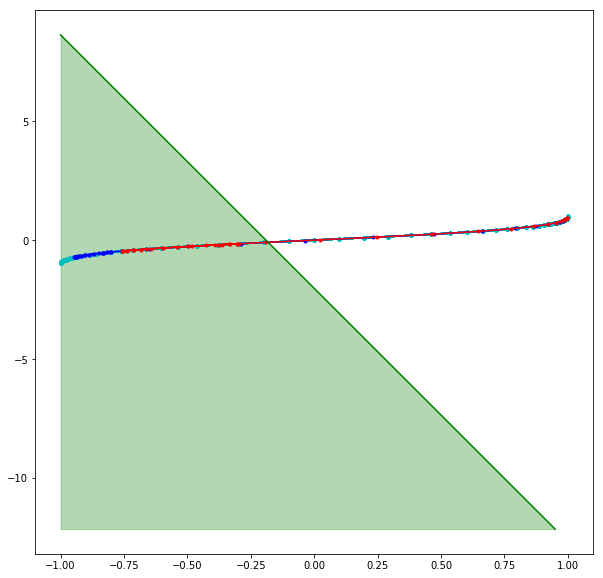

In [778]:
plt.figure(figsize=(10,10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
aPrime = np.linalg.norm(res4_2[0])
bPrime = np.linalg.norm(res4_2[1])
cPrime = np.linalg.norm(res4_2[2])
print([aPrime, bPrime, cPrime])
plt.plot(x, (-cPrime-aPrime*x)/bPrime, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-cPrime-aPrime*x)/bPrime)]),(-cPrime-aPrime*x)/bPrime,color='g',alpha=0.3)

In [779]:
res4_3 = np.array(hingeLossGradientDescent(params3, X, Y, x, y1, y2, dummy))

xHat = np.tanh(res4_3[3]*X + res4_3[5]*Y + res4_3[7])
yHat = np.tanh(res4_3[4]*X + res4_3[6]*Y + b2)
xHat1 = np.tanh(res4_3[3]*x + res4_3[5]*y1 + b1)
yHat1 = np.tanh(res4_3[4]*x + res4_3[6]*y1 + b2)
xHat2 = np.tanh(res4_3[3]*x + res4_3[5]*y2 + b1)
yHat2 = np.tanh(res4_3[4]*x + res4_3[6]*y2 + b2)

[-5.39938868 -5.39919353 -5.39887988 -5.39836697 -5.39751132 -5.39605656
 -5.39354484 -5.38916755 -5.38153319 -5.36836154 -5.34622539 -5.3107102
 -5.25764379 -5.18575946 -5.09948711 -5.00876242 -4.92465921 -4.85439235
 -4.79934873 -4.75370524 -4.68540986 -4.3783428  -2.68505919  0.30742338
  1.20103243  1.29298814  1.29463906  1.28591749  1.27322239  1.25709109
  1.2378743   1.21625471  1.19334342  1.17065641  1.14998487  1.13319752
  1.12203784  1.11796409  1.12203272  1.13478263]


[1197304.3038103171, 109733.34385173648, 158099.10939353984]


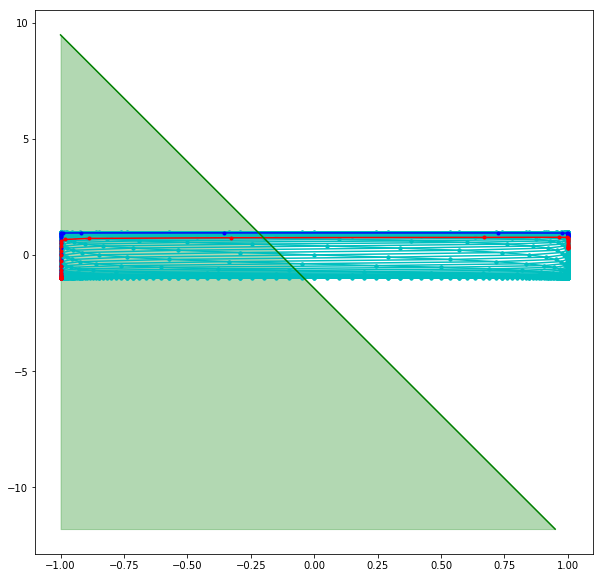

In [780]:
plt.figure(figsize=(10,10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
aPrime = np.linalg.norm(res4_3[0])
bPrime = np.linalg.norm(res4_3[1])
cPrime = np.linalg.norm(res4_3[2])
print([aPrime, bPrime, cPrime])
plt.plot(x, (-cPrime-aPrime*x)/bPrime, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-cPrime-aPrime*x)/bPrime)]),(-cPrime-aPrime*x)/bPrime,color='g',alpha=0.3)